In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import matplotlib.pyplot as plt

In [ ]:
sequence=np.array([i for i in range(1,1001)])
window_size=3
X=[]
y=[]

In [ ]:
for i in range(len(sequence)-window_size):
  X.append(sequence[i:i+window_size])
  y.append(sequence[i+window_size])

X=np.array(X)
y=np.array(y)
X=X.reshape(X.shape[0],X.shape[1],1)

In [ ]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(X,y,epochs=500, verbose=0)
print("Training completed")

Training completed


In [ ]:
test_input = np.array([115, 116, 117])
test_input = test_input.reshape((1, window_size, 1))
predicted = model.predict(test_input, verbose=0)
print(predicted)

[[118.008934]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


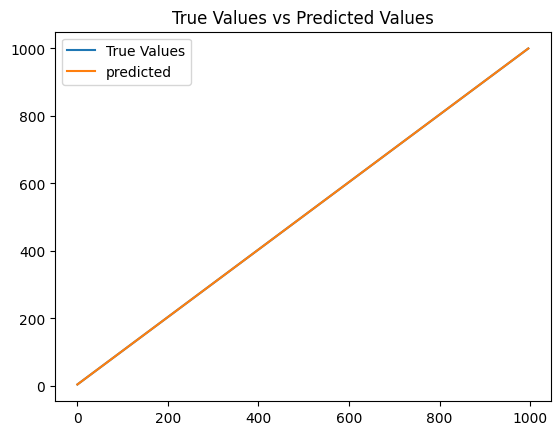

In [ ]:
predictions = model.predict(X)
plt.plot(y,label='True Values')
plt.plot(predictions, label='predicted')
plt.legend()
plt.title('True Values vs Predicted Values')
plt.show()

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
my_input = np.array([1100, 1101, 1102])

# Reshape the input to match the model's expected input shape
my_input = my_input.reshape((1, window_size, 1))

# Get the prediction from the loaded model
my_prediction = loaded_model.predict(my_input)

# Print the prediction
print(f"Input: {my_input.flatten()}")
print(f"Predicted output: {my_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Input: [1100 1101 1102]
Predicted output: 1103.080810546875


In [ ]:
model.save("model.h5")

In [ ]:
model.save("model.keras")